## 1.1 Introduction

**Dataset:** Customer Churn Dataset
<br>**Source:** Kaggle
<br>**Context:** This Dataset contains the financial information of an membership firm.
<br>**Objective:** Objective is to predict risk score of the member so that organization can avert the risk fafctor.


## 1.2 Preprocessing Dataset

### 1.2.1 Importing Libraries

In [1]:
import os
import warnings

import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### 1.2.2 Reading Dataset

In [2]:
df = pd.read_parquet(r'../dataset/churn.parquet')
df.head(3)

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1


### 1.2.3 Analyze Dataset Structure

#### 1.2.3.1 Rows & Columns

In [3]:
print(f"Dataset contains {df.shape[0]} records and {df.shape[1]} features..!!")

Dataset contains 36992 records and 23 features..!!


#### 1.2.3.2 Removing Duplicates

In [4]:
print(f"Dropping: Duplicate Records\t {df.duplicated().sum()}")
df = df.drop_duplicates()

Dropping: Duplicate Records	 0


#### 1.2.3.3 Features Statistics


In [5]:
target_feature = df['churn_risk_score']

features = ['age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback',]

# Dropping Identifiers & Textual Features
df = df.drop(columns = ['security_no', 'joining_date', 'joined_through_referral', 'referral_id', 'last_visit_time', 'feedback'])


numeric_features = df.select_dtypes(include=np.number)
categorical_features = df.select_dtypes(exclude=np.number)

In [6]:
# Numeric Features Stats
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36992.0,37.118161,15.867412,10.000000,23.0000,37.000,51.000,64.000000
days_since_last_login,36992.0,-41.915576,228.819900,-999.000000,8.0000,12.000,16.000,26.000000
avg_time_spent,36992.0,243.472334,398.289149,-2814.109110,60.1025,161.765,356.515,3235.578521
avg_transaction_value,36992.0,29271.194003,19444.806226,800.460000,14177.5400,27554.485,40855.110,99914.050000
points_in_wallet,33549.0,686.882199,194.063624,-760.661236,616.1500,697.620,763.950,2069.069761
churn_risk_score,36992.0,0.540982,0.498324,0.000000,0.0000,1.000,1.000,1.000000


In [7]:
# Categorical Features Stats
categorical_features.describe().T

,count,unique,top,freq
gender,36992,3,F,18490
region_category,31564,3,Town,14128
membership_category,36992,6,Basic Membership,7724
preferred_offer_types,36704,3,Gift Vouchers/Coupons,12349
medium_of_operation,36992,4,Desktop,13913
internet_option,36992,3,Wi-Fi,12413
avg_frequency_login_days,36992,1654,Error,3522
used_special_discount,36992,2,Yes,20342
offer_application_preference,36992,2,Yes,20440
past_complaint,36992,2,No,18602


#### 1.3.3.4 Checking NA Values

In [8]:
# checking NA Values in numeric_cols
100*(numeric_features.isna().sum()/numeric_features.shape[0])

age                      0.000000
days_since_last_login    0.000000
avg_time_spent           0.000000
avg_transaction_value    0.000000
points_in_wallet         9.307418
churn_risk_score         0.000000
dtype: float64

In [9]:
# checking NA Values in categorical_cols
100*(categorical_features.isna().sum()/categorical_features.shape[0])

gender                           0.000000
region_category                 14.673443
membership_category              0.000000
preferred_offer_types            0.778547
medium_of_operation              0.000000
internet_option                  0.000000
avg_frequency_login_days         0.000000
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
dtype: float64

In [10]:
# Checking NA Values in Target feature
target_feature.isna().sum()

np.int64(0)

#### 1.3.3.4.1 Ploting NA Values

<Axes: >

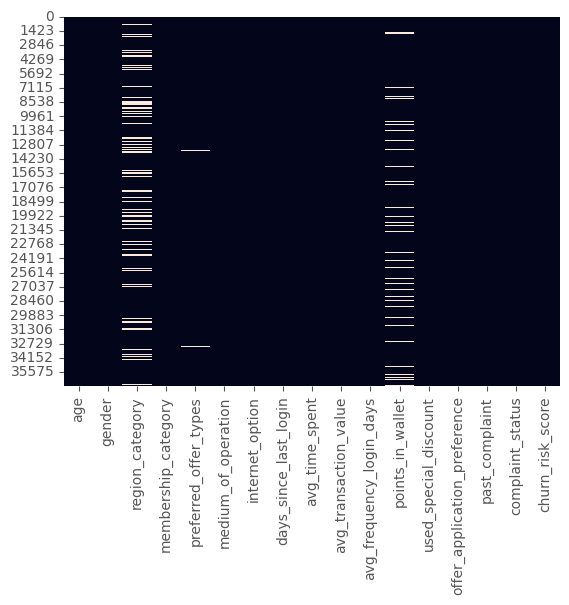

In [11]:
sns.heatmap(df.isna(), cbar = False)

**Initial Observations**<br>
- `region_category` and `points_in_wallets`has high number of null values
- `reffered_offer_types` has  less null values

- `age`: numeric col: suggests normal distribution
- `days_since_last_login`: scaler quantity: it contains -ive values
- `security_no`: identifier (must be dropped)

### 1.2.4 EDA

#### 1.2.4.1 Univariate Analysis

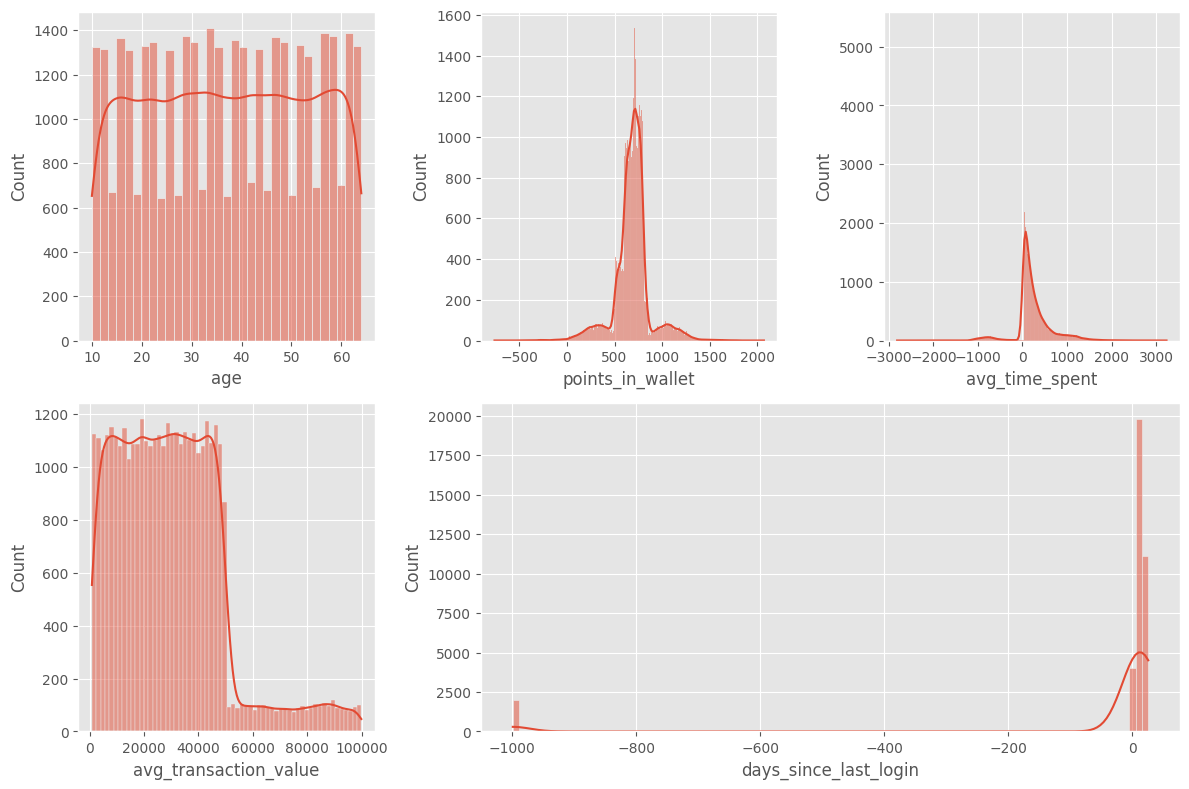

In [12]:
# Numeric Features
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 3)

ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(numeric_features['age'], kde = True, ax = ax1)

ax2 = fig.add_subplot(gs[0, 1])
sns.histplot(numeric_features['points_in_wallet'], kde = True, ax = ax2)

ax3 = fig.add_subplot(gs[0, 2])
sns.histplot(numeric_features['avg_time_spent'], kde = True, ax = ax3)

ax4 = fig.add_subplot(gs[1, 0])
sns.histplot(numeric_features['avg_transaction_value'], kde = True, ax = ax4)

ax5 = fig.add_subplot(gs[1, 1:])
sns.histplot(numeric_features['days_since_last_login'], bins = 100, kde = True, ax = ax5)


fig.set_tight_layout('tight')
plt.show()

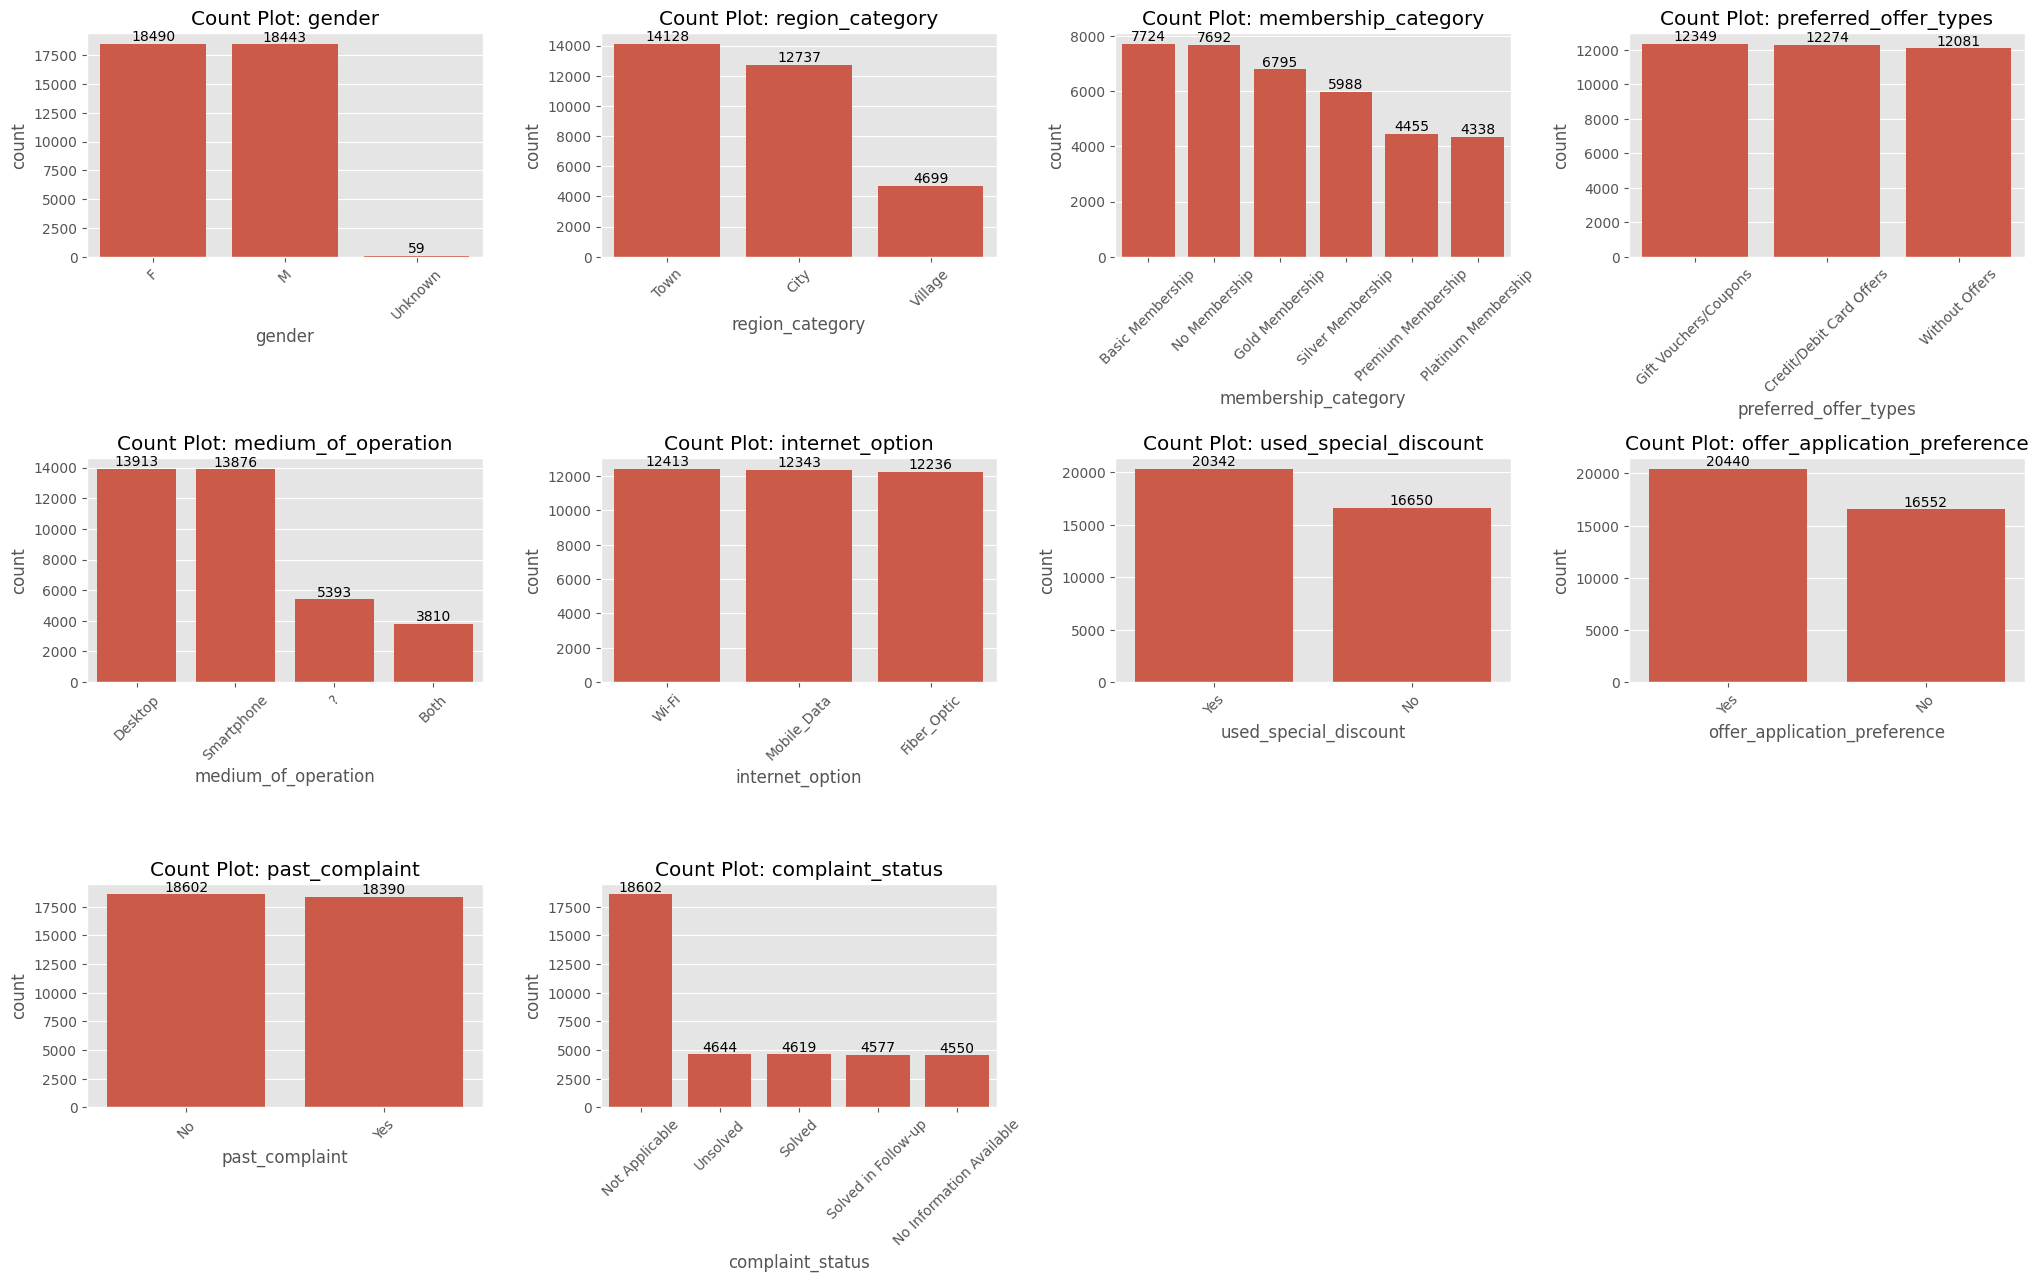

cols with high cardinality: ('avg_frequency_login_days',)


In [13]:
high_cardinality_cols = tuple()

fig = plt.figure(figsize=(25, 25))
gs = GridSpec(5, 4, figure=fig, wspace=0.3, hspace=0.9)

_ = []
plot_num = 0  # Track how many plots have been drawn

for col in categorical_features.columns:
    if df[col].nunique() <= 10:
        # Calculate current row and column for grid
        row_index = plot_num // 4
        col_index = plot_num % 4

        ax = fig.add_subplot(gs[row_index, col_index])
        _.append(ax)

        sns.countplot(
            x=categorical_features[col],
            ax=ax,
            order=categorical_features[col].value_counts().index
        )

        ax.bar_label(ax.containers[0])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_title(f"Count Plot: {col}")

        plot_num += 1  # Only increment if we plotted

    else:
        high_cardinality_cols += (col, )

plt.tight_layout()
plt.show()

print(f"cols with high cardinality: {high_cardinality_cols}")

- **`gender`**: suggests it has invalid values: 'unknown'
- `region_category`: `Town` > `City` > `Village`
- `membership_category`: `Basic Membership` > `No Membership` > `Gold Membership` > `Silver Membership` > `Premium Membership` > `Platinium Membership`
- **`joined through referals`** contains missing values: '?'
- `preferred_offer_types`: Gift Voucher ~ Debit Card Offers ~ Without Offers
- **`medium of operation`** has missing values: ?
- `internet_option` Wifi ~ MobileData ~ Fiber Optic
- `used_special_discount` Yes > No
- `offer_application_preference` Yes > No
- `past complaint` Yes ~ No
- `complaint_status` Not Applicable > Unresolved ~ Solved ~ Solved in Follow-up ~ No Info Available
- `feedback` Poor Product Quality ~ No reason Specified ~ Too many ads ~ Poor Webssite ~ Poor Customer Service
- High Cardinality Cols: **`joining_date`**, **`referral_id`**, **`last_visit_time`**, **`avg_frequency_login_days`**

#### 1.2.4.2 Cleaning Dataset

##### 1.2.4.2.1 Cleaning Feature: avg_frequency_login_days

In [14]:
def check_numeric_val(val):
    '''This Function will return Numeric Value if string is numeric in nature else return np.nan'''
    try: 
        return float(val)
    except Exception as e:
        return np.nan
        
# Preprocessing last_visit_time
# Typecasting to int
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].map(check_numeric_val)


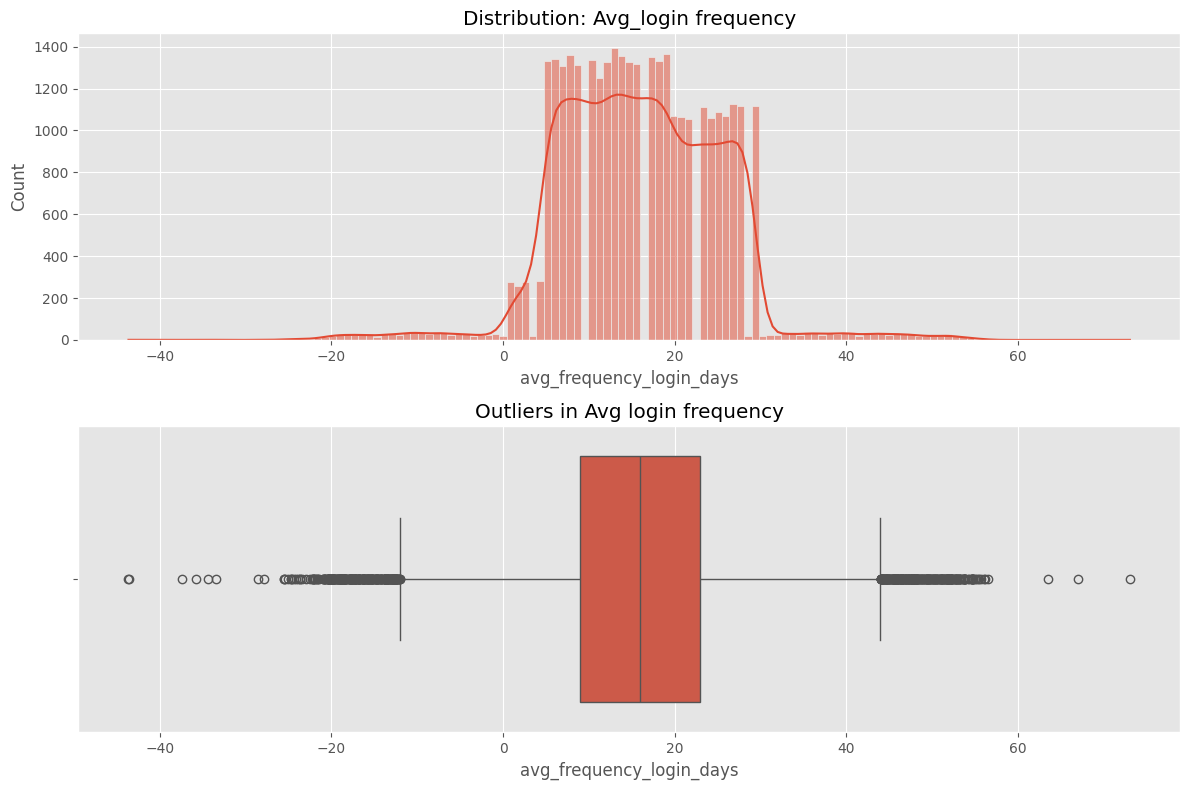

In [15]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('Distribution: Avg_login frequency')
sns.histplot(x = df['avg_frequency_login_days'], ax = ax1, kde = True)

ax2 = fig.add_subplot(gs[1, 0])
ax2.set_title('Outliers in Avg login frequency')
sns.boxplot(data = df, 
            x = 'avg_frequency_login_days', ax = ax2)

plt.tight_layout()
plt.show()

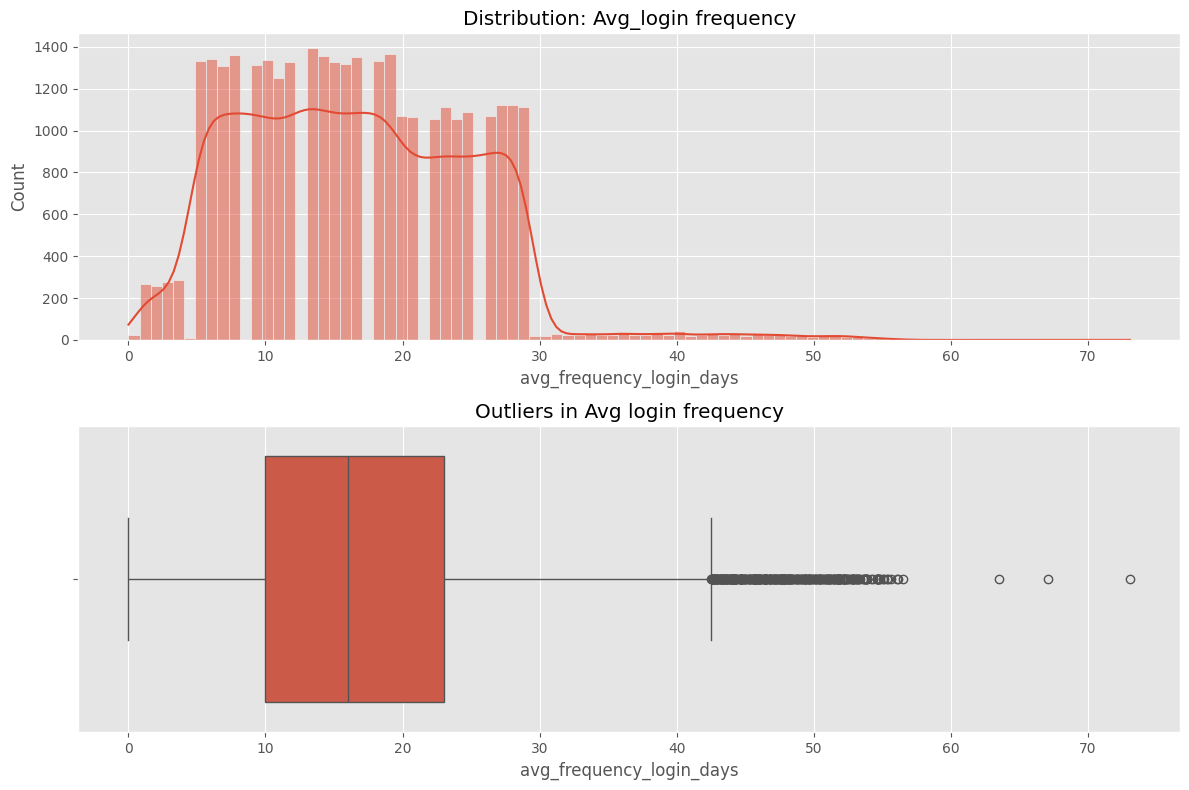

In [16]:
# Updating Avg_frequency_login_days where -ive values
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].map(lambda x: np.nan if x<0 else x)

fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('Distribution: Avg_login frequency')
sns.histplot(x = df['avg_frequency_login_days'], ax = ax1, kde = True)

ax2 = fig.add_subplot(gs[1, 0])
ax2.set_title('Outliers in Avg login frequency')
sns.boxplot(data = df, 
            x = 'avg_frequency_login_days', ax = ax2)

plt.tight_layout()
plt.show()

#### Preprocessing Column: 'Gender'

In [17]:
print(df['gender'].value_counts())

# Dropping Rows gender = 'Unknown'
print(f'\n\t- Dropping Rows where Gender = "Unknown" (59 Records)..!\n')
df = df.drop(
    index = df.loc[df['gender'] == 'Unknown'].index
).reset_index(drop = True)

le = LabelEncoder()
df['gender_encoded'] = le.fit_transform(df['gender'])

print(f"\t- Feature Encoded: ['F' : 0, 'M' : 1]")

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

	- Dropping Rows where Gender = "Unknown" (59 Records)..!

	- Feature Encoded: ['F' : 0, 'M' : 1]


#### Preprocessing Column: Region_Category

region_category
Town       14099
City       12721
Village     4693
Name: count, dtype: int64


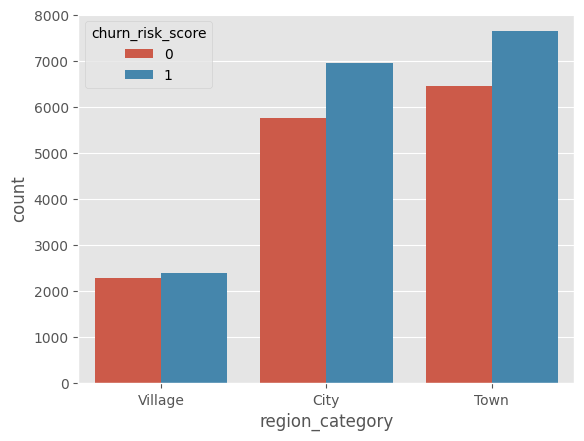

	- Above graph shows clear order between region


In [18]:
print(df['region_category'].value_counts())

sns.countplot(data = df, x = 'region_category', hue = 'churn_risk_score')
plt.show()
print(f"\t- Above graph shows clear order between region")

region_encoded = pd.get_dummies(df['region_category'], prefix='region_category_encoded_', drop_first=True, dtype=int)

df = pd.concat((df, region_encoded), axis = 1)


#### Preprocessing membership_category

NULL Values: membership_category: 0

membership_category
Basic Membership       7710
No Membership          7681
Gold Membership        6785
Silver Membership      5979
Premium Membership     4444
Platinum Membership    4334
Name: count, dtype: int64



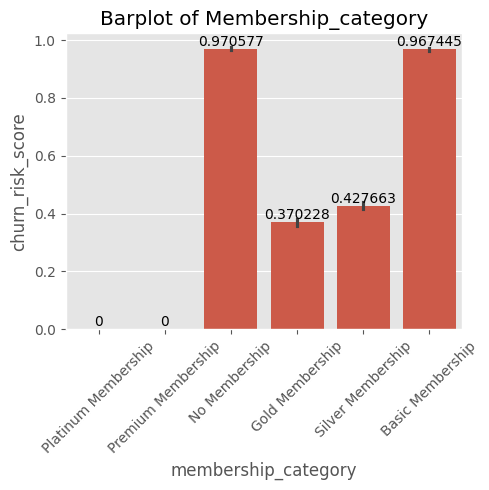

In [19]:
print(f"NULL Values: membership_category: {df['membership_category'].isna().sum()}")
print(f"\n{df['membership_category'].value_counts()}\n")
plt.figure(figsize=(5, 5))
ax = sns.barplot(data = df, y = 'churn_risk_score', x = 'membership_category', estimator='mean')
ax.bar_label(container=ax.containers[0])

plt.title('Barplot of Membership_category')
plt.xticks(rotation=45 )
plt.tight_layout()
plt.show()

In [20]:
encoded_membership_category = pd.get_dummies(df['membership_category'], prefix='membership_category_encoded_', drop_first=1, dtype=int)
df = pd.concat((df, encoded_membership_category), axis = 1)

#### Preprocessing preferred_offer_types

NULL Values: preferred_offer_types: 287

preferred_offer_types
Gift Vouchers/Coupons       12322
Credit/Debit Card Offers    12256
Without Offers              12068
Name: count, dtype: int64



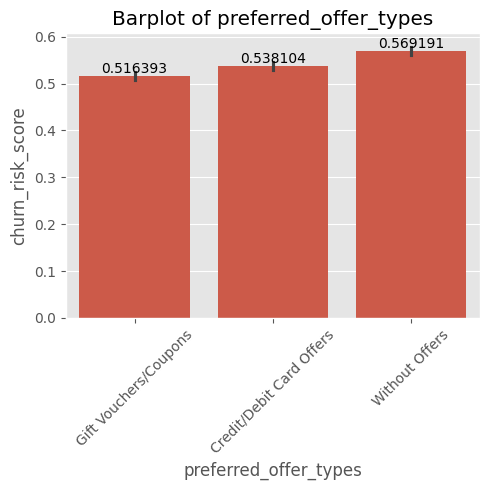

In [21]:
print(f"NULL Values: preferred_offer_types: {df['preferred_offer_types'].isna().sum()}")
print(f"\n{df['preferred_offer_types'].value_counts()}\n")
plt.figure(figsize=(5, 5))
ax = sns.barplot(data = df, y = 'churn_risk_score', x = 'preferred_offer_types', estimator='mean')
ax.bar_label(container=ax.containers[0])

plt.title('Barplot of preferred_offer_types')
plt.xticks(rotation=45 )
plt.tight_layout()
plt.show()

In [22]:
# One-hot encoding
prefered_offered_types = pd.get_dummies(df['preferred_offer_types'], prefix='offer_type', drop_first=True, dtype = int)
df = pd.concat((df, prefered_offered_types), axis = 1)

#### Preprocessing medium_of_operation

NULL Values: medium_of_operation: 0

medium_of_operation
Desktop       13893
Smartphone    13855
?              5379
Both           3806
Name: count, dtype: int64



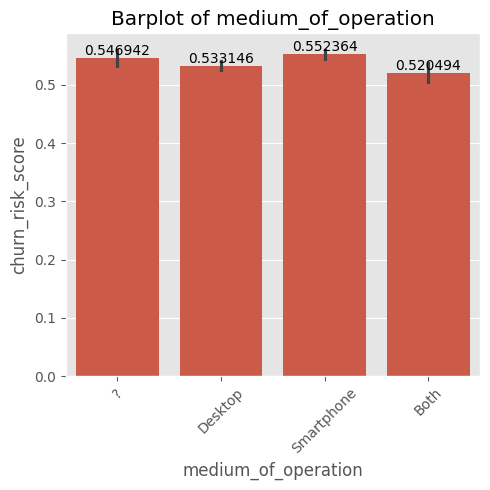

	- Dropping NA Values: medium of operation


In [23]:
print(f"NULL Values: medium_of_operation: {df['medium_of_operation'].isna().sum()}")
print(f"\n{df['medium_of_operation'].value_counts()}\n")
plt.figure(figsize=(5, 5))
ax = sns.barplot(data = df, y = 'churn_risk_score', x = 'medium_of_operation', estimator='mean')
ax.bar_label(container=ax.containers[0])

plt.title('Barplot of medium_of_operation')
plt.xticks(rotation=45 )
plt.tight_layout()
plt.show()

print(f"\t- Dropping NA Values: medium of operation")
df = df.dropna(subset = 'medium_of_operation', ignore_index=True)


In [24]:
medium_of_operation = pd.get_dummies(df['medium_of_operation'], dtype = int, prefix='medium_of_operation_encoded_', drop_first=True)
df = pd.concat((df, medium_of_operation), axis = 1)


#### Preprocessing internet_operation

NULL Values: internet_option: 0

internet_option
Wi-Fi          12393
Mobile_Data    12327
Fiber_Optic    12213
Name: count, dtype: int64



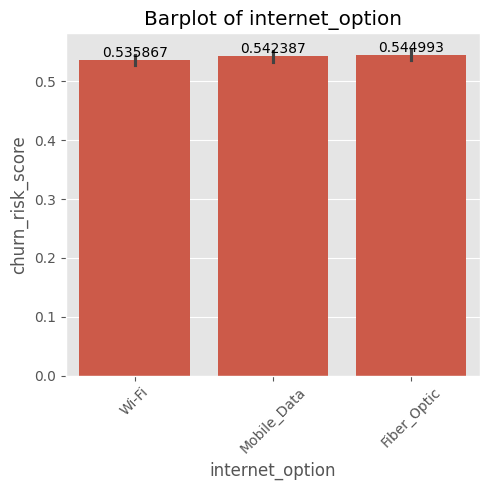

In [25]:
print(f"NULL Values: internet_option: {df['internet_option'].isna().sum()}")
print(f"\n{df['internet_option'].value_counts()}\n")
plt.figure(figsize=(5, 5))
ax = sns.barplot(data = df, y = 'churn_risk_score', x = 'internet_option', estimator='mean')
ax.bar_label(container=ax.containers[0])

plt.title('Barplot of internet_option')
plt.xticks(rotation=45 )
plt.tight_layout()
plt.show()


internet_option = pd.get_dummies(df['internet_option'], dtype = int, prefix='internet_option_encoded_', drop_first=True)
df = pd.concat((df, internet_option), axis = 1)


	- Feature: days_since_last_login: Scaler Unit taking mod..!!


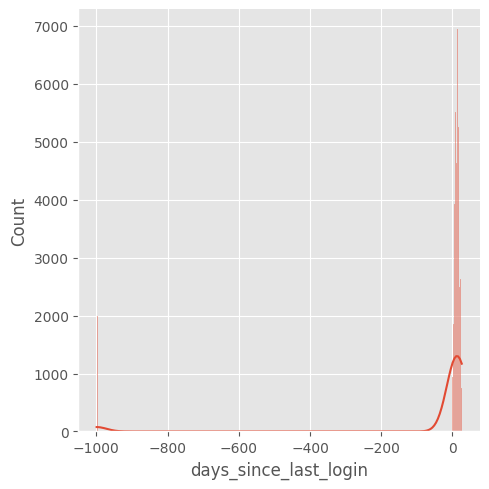

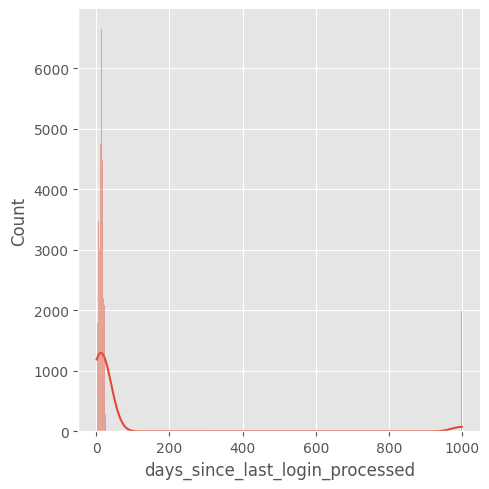

In [57]:

ax = sns.displot(x = df['days_since_last_login'], kde = True)
ax.set_titles('Feature: days_since_last_login before Processing')

print(f"\t- Feature: days_since_last_login: Scaler Unit taking mod..!!")
df['days_since_last_login_processed'] = df['days_since_last_login'].abs()


ax2 = sns.displot(x = df['days_since_last_login_processed'], kde = True)
ax2.set_titles('Feature: days_since_last_login after Processing')
plt.show()


	- Feature: avg_time_spent: Scaler Unit taking mod..!!


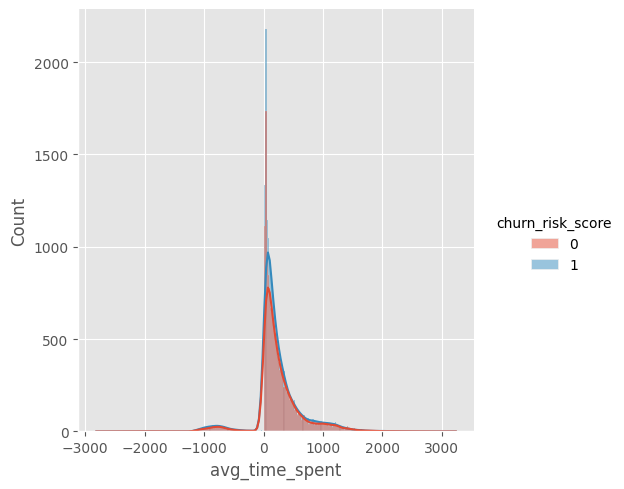

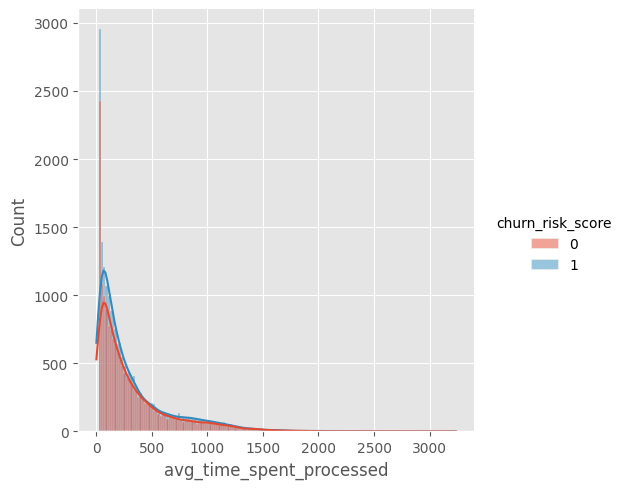

In [62]:

ax = sns.displot(x = df['avg_time_spent'], kde = True, hue = df['churn_risk_score'])
ax.set_titles('Feature: avg_time_spent before Processing')

print(f"\t- Feature: avg_time_spent: Scaler Unit taking mod..!!")
df['avg_time_spent_processed'] = df['avg_time_spent'].abs()


ax2 = sns.displot(x = df['avg_time_spent_processed'], kde = True, hue = df['churn_risk_score'])
ax2.set_titles('Feature: avg_time_spent after Processing')
plt.show()


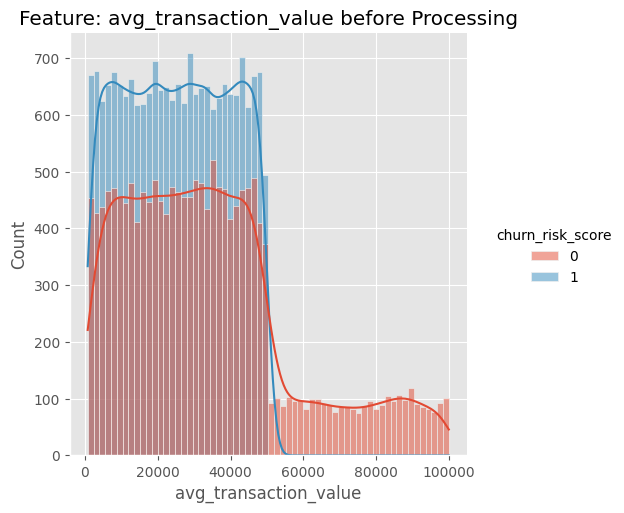

In [71]:
sns.displot(x = df['avg_transaction_value'], kde = True, hue = df['churn_risk_score'], ax = ax1)
plt.title('Feature: avg_transaction_value before Processing')
plt.show()

<Axes: ylabel='avg_frequency_login_days'>

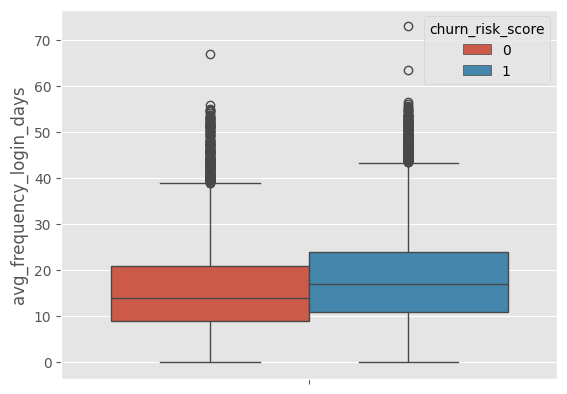

In [78]:
sns.boxplot(y = df['avg_frequency_login_days'], hue = df['churn_risk_score'])
